In [23]:
import os, json, gzip, pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [ ]:
#  get small subset for experimenting
# !wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Cell_Phones_and_Accessories_5.json.gz

In [4]:
# load data
## l.strip() to prevent the load of empty lines
## get into pandas dataframe for better data handling
input = '../Data/reviews_Cell_Phones_and_Accessories_5.json.gz'
data = []
with gzip.open(input) as f:
    for l in f:
        data.append(json.loads(l.strip()))

df = pd.DataFrame.from_dict(data)
df = df[['reviewText', 'overall']]

# total length of dataframe, this number equals total number of review
print("Amount of reviews: ", len(data))
# first row of the dataframe
# print(df.loc[0])

194439
{'reviewerID': 'A30TL5EWN6DFXT', 'asin': '120401325X', 'reviewerName': 'christina', 'helpful': [0, 0], 'reviewText': "They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again", 'overall': 4.0, 'summary': 'Looks Good', 'unixReviewTime': 1400630400, 'reviewTime': '05 21, 2014'}


5.0    108602
4.0     39974
3.0     21436
1.0     13269
2.0     11059
Name: overall, dtype: int64


(array([ 13269.,  11059.,  21436.,  39974., 108602.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <BarContainer object of 5 artists>)

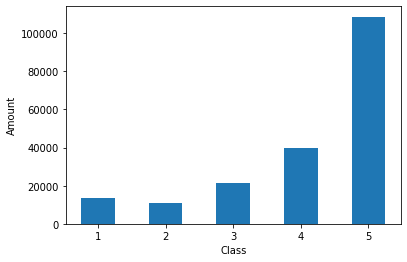

In [113]:
from matplotlib import pyplot as py
print(df['overall'].value_counts())
# xticks =[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
# # plt.xticks(np.arange(0.0,6.0,1.0))
# plt.xticks(xticks)
# plt.hist(df['overall'], xticks, align='left', )
plt.xlabel('Class')
plt.ylabel('Amount')
plt.hist(df['overall'], bins=np.arange(0.5, 6), rwidth=0.5)

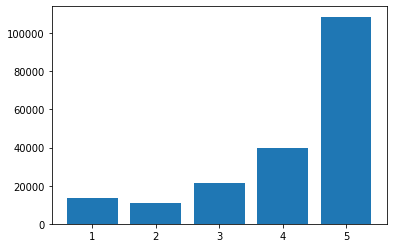

In [119]:
data = df['overall'].value_counts()
fig, ax = plt.subplots()
ax.bar(data.index, data.values)

In [120]:
amounts = data.values
print(amounts)

[108602  39974  21436  13269  11059]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
text = ["They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again"]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
vocab = vectorizer.vocabulary_
print(len(vocab))

In [63]:
df['char_count'] = df['reviewText'].apply(lambda review: len(review))

116     1149
113     1135
115     1131
120     1102
114     1090
        ... 
3521       1
3185       1
3393       1
3057       1
6996       1
Name: char_count, Length: 4776, dtype: int64


Text(0.5, 1.0, 'Text lengths  in char')

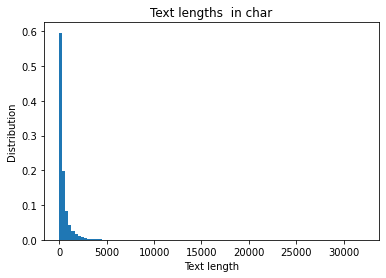

In [39]:
print(df['char_count'].value_counts())

import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
plt.hist(df['char_count'], bins=100, weights= np.ones(len(df))/len(df))
plt.xlabel('Text length')
plt.ylabel('Distribution')
plt.title('Text lengths  in char')

In [67]:
special = df[(df['char_count']==4)]
# df = df[~(df['reviewText']=='')]
print(special)

       reviewText  overall  char_count
296          good      3.0           4
11826        nice      4.0           4
19058        cool      5.0           4
19175        nice      3.0           4
22176        Nice      4.0           4
32312        good      5.0           4
32332        nice      5.0           4
36524        junk      1.0           4
40196        good      4.0           4
41980        Good      4.0           4
67293        good      5.0           4
69533        NICE      5.0           4
76310        Good      5.0           4
81875        Good      5.0           4
84137        cute      3.0           4
93552        Nice      4.0           4
98349        nice      4.0           4
98511        NICE      5.0           4
99952        nice      5.0           4
103189       okay      3.0           4
103360       ugly      1.0           4
105623       nice      4.0           4
106159       good      5.0           4
132704       fine      4.0           4
142818       AAAA      5.

In [28]:
print("Shape: ", df.shape)

Shape:  (194439, 3)


In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194439 entries, 0 to 194438
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   reviewText  194439 non-null  object 
 1   overall     194439 non-null  float64
 2   char_count  194439 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.5+ MB
None


In [59]:
df.describe(include='all')

,reviewText,overall,char_count
count,194340,194340.000000,194340
unique,194185,NaN,4775
top,Love it,NaN,116
freq,10,NaN,1149
mean,NaN,4.129881,NaN
std,NaN,1.222449,NaN
min,NaN,1.000000,NaN
25%,NaN,4.000000,NaN
50%,NaN,5.000000,NaN
75%,NaN,5.000000,NaN


In [13]:
print(df['overall'].dtype)

float64


5.0    108664
4.0     39993
3.0     21439
1.0     13279
2.0     11064
Name: overall, dtype: int64

In [33]:
print(df[df['char_count']]==0)

KeyError: "None of [Int64Index([189, 160, 166, 275, 135, 124, 122,  89, 235, 206,\n            ...\n             94, 390, 349, 326, 767, 118, 180, 758, 116, 290],\n           dtype='int64', length=194439)] are in the [columns]"

In [3]:
data = []
with gzip.open('../Data/reviews_Movies_and_TV_5.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

1697533
{'reviewerID': 'ADZPIG9QOCDG5', 'asin': '0005019281', 'reviewerName': 'Alice L. Larson "alice-loves-books"', 'helpful': [0, 0], 'reviewText': 'This is a charming version of the classic Dicken\'s tale.  Henry Winkler makes a good showing as the "Scrooge" character.  Even though you know what will happen this version has enough of a change to make it better that average.  If you love A Christmas Carol in any version, then you will love this.', 'overall': 4.0, 'summary': 'good version of a classic', 'unixReviewTime': 1203984000, 'reviewTime': '02 26, 2008'}


In [3]:
# convert list into pandas dataframe
df = pd.DataFrame.from_dict(data)

print(len(df))

1697533


In [4]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0005019281,"[0, 0]",4.0,This is a charming version of the classic Dick...,"02 26, 2008",ADZPIG9QOCDG5,"Alice L. Larson ""alice-loves-books""",good version of a classic,1203984000
1,0005019281,"[0, 0]",3.0,It was good but not as emotionally moving as t...,"12 30, 2013",A35947ZP82G7JH,Amarah Strack,Good but not as moving,1388361600
2,0005019281,"[0, 0]",3.0,"Don't get me wrong, Winkler is a wonderful cha...","12 30, 2013",A3UORV8A9D5L2E,Amazon Customer,Winkler's Performance was ok at best!,1388361600
3,0005019281,"[0, 0]",5.0,Henry Winkler is very good in this twist on th...,"02 13, 2008",A1VKW06X1O2X7V,"Amazon Customer ""Softmill""",It's an enjoyable twist on the classic story,1202860800
4,0005019281,"[0, 0]",4.0,This is one of the best Scrooge movies out. H...,"12 22, 2013",A3R27T4HADWFFJ,BABE,Best Scrooge yet,1387670400


In [5]:
print(df.shape)

(1697533, 9)


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697533 entries, 0 to 1697532
Data columns (total 9 columns):
asin              object
helpful           object
overall           float64
reviewText        object
reviewTime        object
reviewerID        object
reviewerName      object
summary           object
unixReviewTime    int64
dtypes: float64(1), int64(1), object(7)
memory usage: 116.6+ MB
None


In [7]:
df.describe(include='all')

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
count,1697533,1697533,1.697533e+06,1697533,1697533,1697533,1691457,1697533,1.697533e+06
unique,50052,9013,NaN,1696352,5799,123960,112400,1296940,NaN
top,B003EYVXV4,"[0, 0]",NaN,,"01 28, 2014",A3LZGLA88K0LA0,Amazon Customer,Great Movie,NaN
freq,2213,608781,NaN,62,2322,2368,11777,4640,NaN
mean,NaN,NaN,4.110648e+00,NaN,NaN,NaN,NaN,NaN,1.262422e+09
std,NaN,NaN,1.197615e+00,NaN,NaN,NaN,NaN,NaN,1.289277e+08
min,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,8.793792e+08
25%,NaN,NaN,4.000000e+00,NaN,NaN,NaN,NaN,NaN,1.164413e+09
50%,NaN,NaN,5.000000e+00,NaN,NaN,NaN,NaN,NaN,1.307491e+09
75%,NaN,NaN,5.000000e+00,NaN,NaN,NaN,NaN,NaN,1.373242e+09


In [9]:
df['overall'].value_counts()

5.0    906608
4.0    382994
3.0    201302
1.0    104219
2.0    102410
Name: overall, dtype: int64

In [15]:
df['unixReviewTime'].count()

1697533